# Principal Component Analysis

* Introduction
* Application on dataset
    * Prepare Data
    * Linear Regression with PCA
* Error Analysis


## Introduction

PCA is a statistical method which can reduce the dimensionality of datasets while preserving the majority of the original data. By converting it into a new coordinate system where the data points are characterized by a group of main components, PCA aids in the discovery of the underlying patterns. These main components are uncorrelated linear combinations of the original variables that are orthogonal to one another. Finding the principle components that account for the most variance in the data set is the aim of principal component analysis (PCA). This is accomplished by computing the eigenvalues and eigenvectors of the data set's covariance matrix. The main components are represented by the eigenvectors, and the variance explained by each principal component is represented by the eigenvalues. 

<div style="text-align:center; border:1px solid black;">
    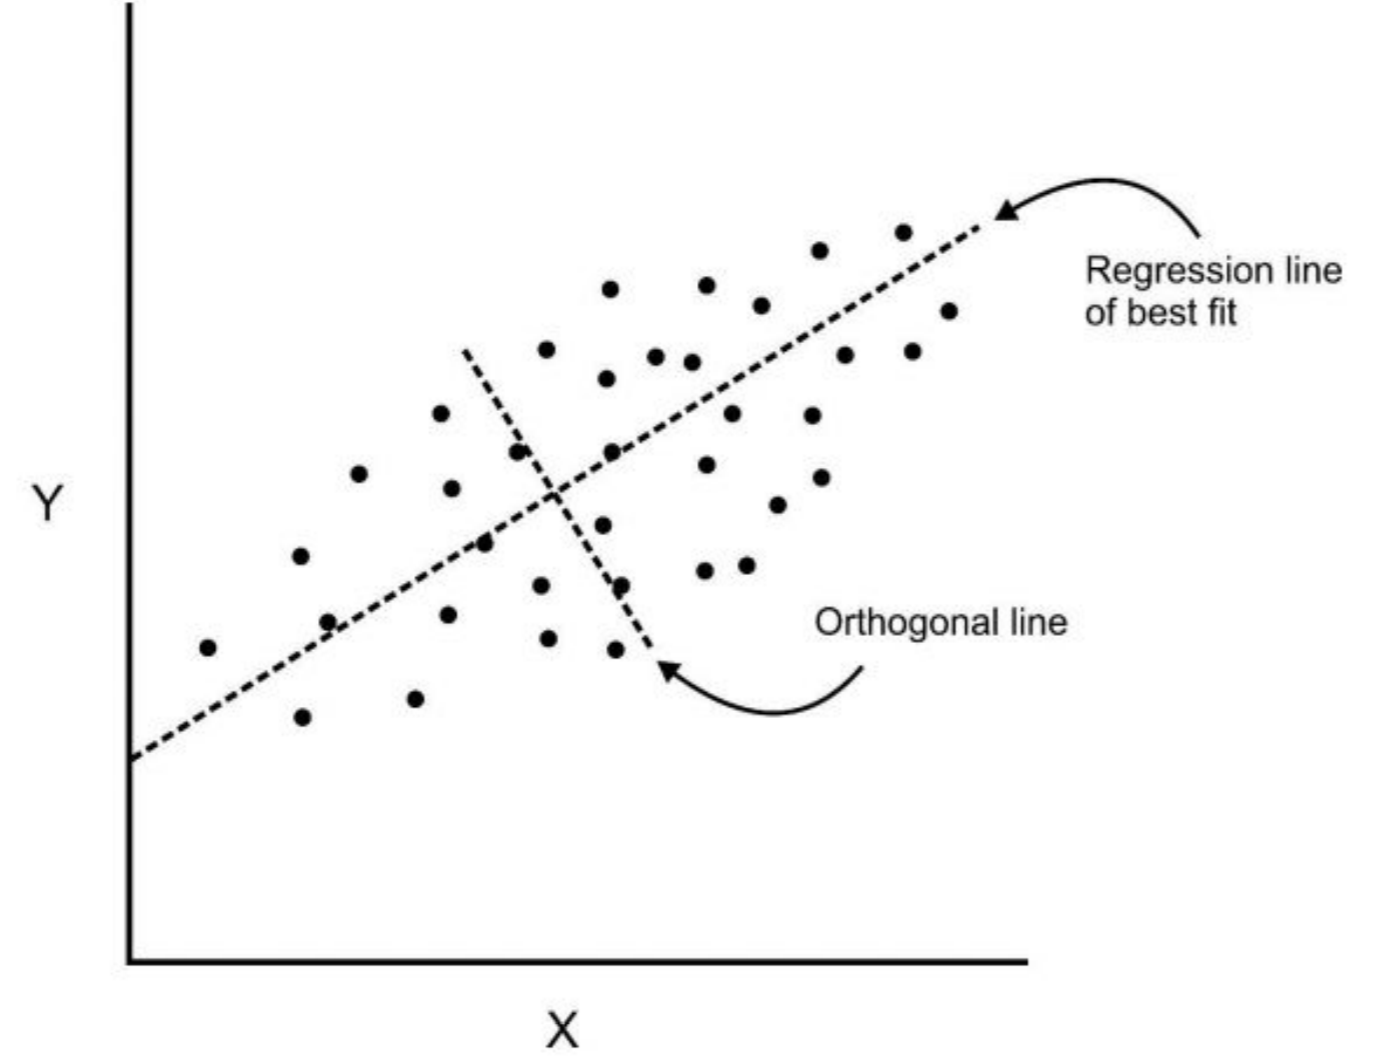
</div>

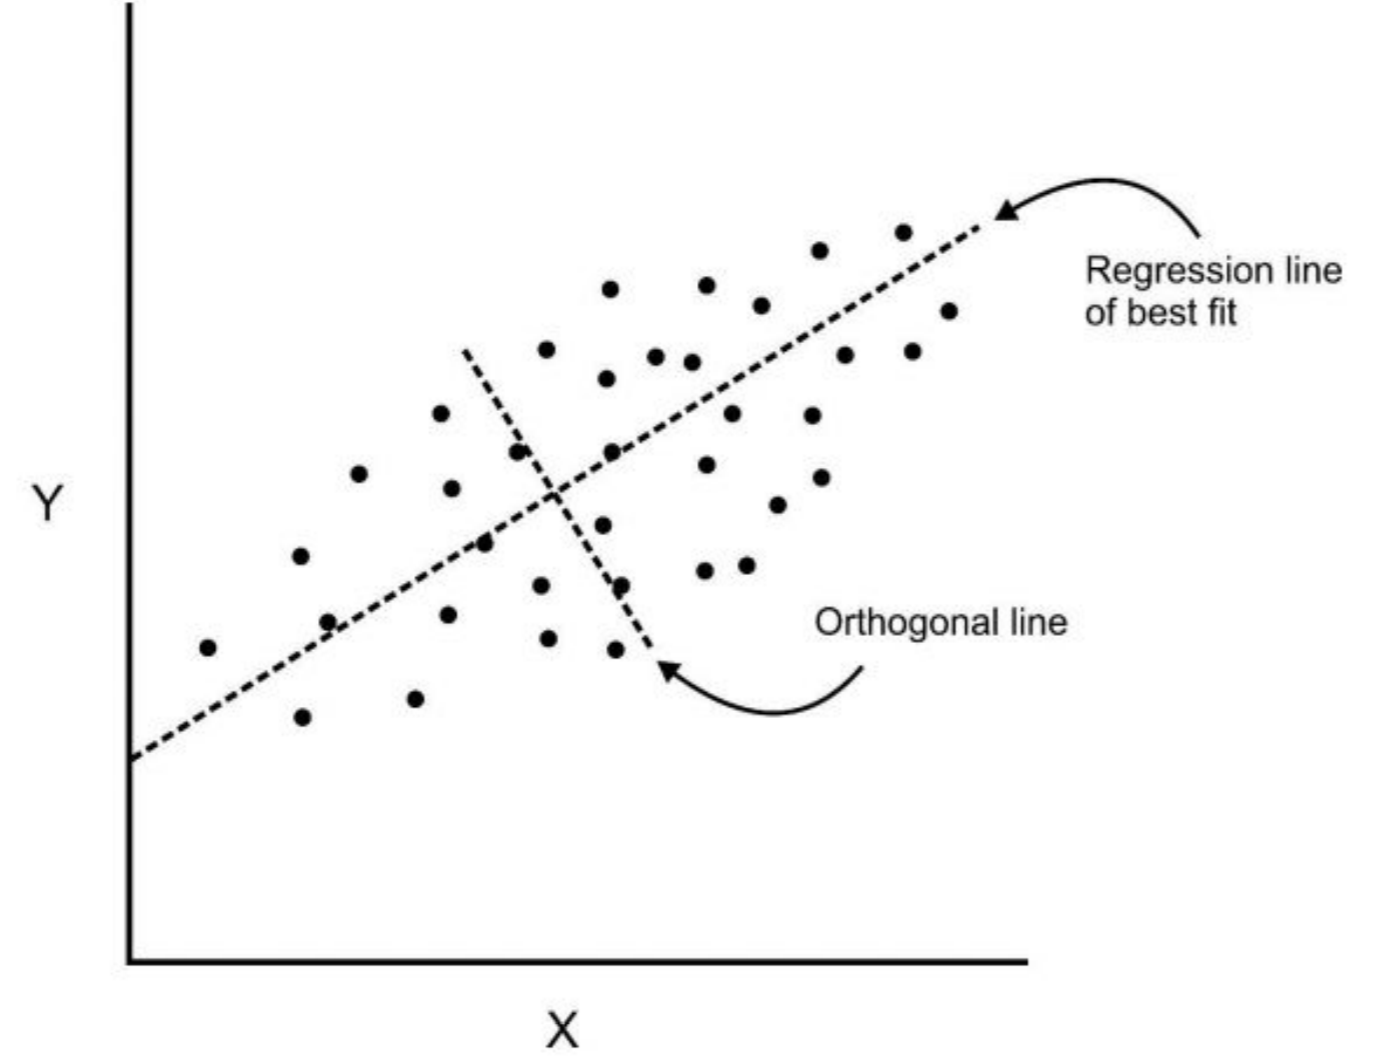

Summarize the algorithm steps of PCA:

There are m pieces of n-dimensional data.

1. Form the original data into an n-row m-column matrix X by column;
2. Zero-meanize each row of X, that is, subtract the mean of this row;
3. Find the covariance matrix;
4. Find the eigenvalues and corresponding eigenvectors of the covariance matrix;
5. Arrange the eigenvectors into a matrix from top to bottom according to the size of the corresponding eigenvalues, and take the first k rows to form a matrix P; That is, the data after dimensionality reduction to k dimensions.

### Properties:


Alleviating the disaster of dimensionality: PCA algorithm can increase the sampling density of samples by discarding part of the information (because the dimensionality is reduced), which is an important means to alleviate the disaster of dimensionality;

Noise reduction: When the data is affected by noise, the eigenvector corresponding to the smallest eigenvalue is often related to noise, and discarding them can achieve the effect of noise reduction to a certain extent;

Overfitting: PCA retains the main information, but this main information is only for the training set, and this main information may not be important information. It is possible to discard some seemingly useless information, but these seemingly useless information happens to be important information, but there is no great performance on the training set, so PCA may also exacerbate overfitting;

Feature independence: PCA not only compresses the data to low dimensions, but also makes the features of the reduced data independent of each other;

## Application On Dataset

In [9]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Prepare Data

In [25]:
df = pd.read_csv("/Users/liusiling/Desktop/semester2/577_github/Country-data.csv") 
df.shape

(167, 10)

In [26]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [27]:
df = df.drop(['country'], axis=1)

In [28]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
for feature in df.columns[:-1]:
    df[[feature]] = scaler.fit_transform(df[[feature]])

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
X[1:5]

array([[ 0.72407239, -0.65618364],
       [-0.09680905, -0.47784487],
       [-3.00379943,  1.78789164],
       [ 1.18044444,  0.08385569]])

## Linear Regression with PCA

In [36]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
# Create linear regression model
lm = LinearRegression()

# Fit data
lm.fit(X_train, y_train)


scores = cross_val_score(
            lm, 
            X_train,
            y_train,
            cv=20,
            scoring="neg_mean_squared_error"
)
lm_score =lm.score(X_train, y_train)
lm_score

0.4954407870253408

This score is not good, we can try more number of principle components to find the optimal one.

## Try Different Number of Principle Components

In [50]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

lr = LinearRegression()

for i in range(1, df.shape[1]):
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    pca = PCA(n_components = i)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    lr.fit(X_train, y_train)
    lr_score =lr.score(X_train, y_train)
    y_hat = lr.predict(X_test)
    print("PC:", i,"MSE:", np.round(mean_squared_error(y_test, y_hat),2),"Score:",lr_score)

PC: 1 MSE: 322013621.91 Score: 0.5033826589918271
PC: 2 MSE: 134170081.5 Score: 0.48805488718042533
PC: 3 MSE: 151327302.14 Score: 0.4731275230349049
PC: 4 MSE: 317710076.13 Score: 0.5898130966465518
PC: 5 MSE: 27665467.15 Score: 0.8649767204771447
PC: 6 MSE: 35773591.35 Score: 0.8620678637980287
PC: 7 MSE: 70242335.98 Score: 0.8679061092649265
PC: 8 MSE: 72460842.56 Score: 0.8635681018239866


we can see that the score of the model has been around 0.86 after PC=5, so the most appropriate number of principle components is 5, in this case, we can retain a lot of variation of data. Let's try the following linear regression model.

In [60]:
for feature in df.columns[:-1]:
    df[[feature]] = scaler.fit_transform(df[[feature]])

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# reduce the PCA to visualize the components
pca = PCA(n_components = 5)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
class lr():
    def __init__(self):
        self.X = None
        self.y = None
        self.betahat=None
        self.yhat = None
        self.n = None
        self.p = None
        self.bias = None
        
    def fit(self,X,y,bias):
        
        if bias:
            X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
            
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        betahat = np.linalg.inv(X.T @ X) @ X.T @ y
        self.betahat = betahat
        self.yhat = X @ betahat
        
    
    def predict(self, x):
        if self.bias:
            ones_column = np.ones((x.shape[0], 1))
            x = np.append(ones_column, x, axis=1)
        return x @ self.beta_hat
    
    def SSE(self):
        return (self.y-self.yhat).T@(self.y-self.yhat)
    
    def MSE(self):
        return self.SSE()/(self.n-self.p)
    
    def SSR(self):
        return (self.yhat - np.mean(self.y)).T @ (self.yhat - np.mean(self.y))

    def SST(self):
        return (self.y-np.mean(self.yhat)).T@(self.y-np.mean(self.yhat))
    
    def MSR(self):
        return self.SSR()/(self.p-1)
    
    def R_2(self):
        return 1 - self.SSE()/self.SST()

In [62]:
model = lr()
model.fit(X_train,y_train,bias=True)

In [63]:
model.betahat

array([12409.16543713,  6549.89276473,   -95.81476828,   828.10207206,
        7509.14760335, 11798.34990026])

## Error Analysis

In [64]:
print(f"SSE:{model.SSE()}")
print(f"MSE:{model.MSE()}")
print(f"SSR:{model.SSR()}")
print(f"MSR:{model.MSR()}")
print(f"R^2:{model.R_2()}")

SSE:5158220748.62166
MSE:40615911.40646976
SSR:36802427916.626465
MSR:7360485583.325293
R^2:0.8770700427018492


$R^2$ is close to 1, so the model performance is not bad. Our PCA actually reduced the data dimension. 